In [1]:
import geokit as gk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gk.__version__

'1.3.0'

# Extent
The Extent object represents geographic extents of an area and exposes useful
methods which depend on those extents. Just some examples for the extent object.

Example: Warp the GHI-rasterfile to the area of the extent.

In [3]:
gk.Extent?

In [4]:
# definition of the extent
ext = gk.Extent( 6, 50, 6.75, 51.25, srs=gk.srs.EPSG4326 )

c:\users\ra.maier\code\geokit\geokit\core\raster.py:1560: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


AxHands(ax=<matplotlib.axes._axes.Axes object at 0x00000289A8EEFE80>, handles=<matplotlib.image.AxesImage object at 0x00000289A8FA9640>, cbar=<matplotlib.colorbar.Colorbar object at 0x00000289A8FB2190>)

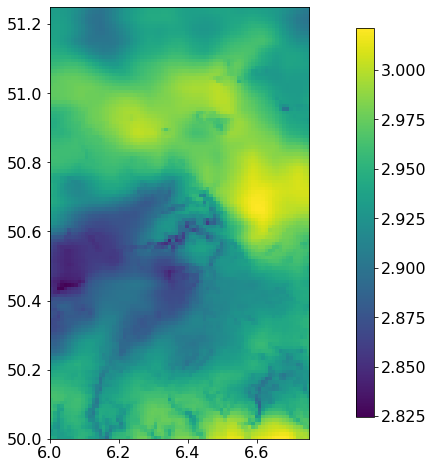

In [5]:
# Clip a raster (GHI tif file) to the area of the extent
clipped_ghi = ext.warp(
    source=gk._test_data_["gsa-ghi-like.tif"],
    resampleAlg='bilinear',
    pixelWidth=0.01,
    pixelHeight=0.01
)

gk.drawRaster(clipped_ghi, figsize=(6,6))

Get extent as a geometry object / box.

In [6]:
ext.box

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x00000289A90615A0> >

Create two shifted extents, combine and get extent of combined box. 

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x00000289A90CBBE0>, handles=[<matplotlib.patches.PathPatch object at 0x00000289A90F6340>, <matplotlib.patches.PathPatch object at 0x00000289A90F6970>, <matplotlib.patches.PathPatch object at 0x00000289A90F6B80>], cbar=None)

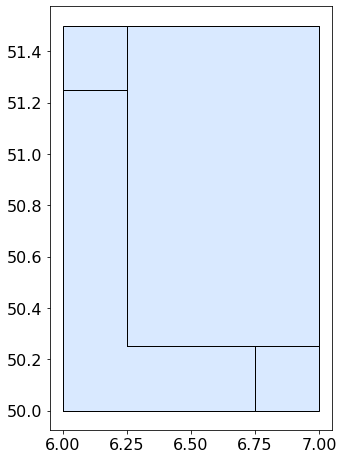

In [7]:
ext =  gk.Extent( 6, 50, 6.75, 51.25, srs=gk.srs.EPSG4326 )
ext2 = gk.Extent( 6.25, 50.25, 7, 51.5, srs=gk.srs.EPSG4326 )

ext3 = ext + ext2

gk.drawGeoms( [ext3.box, ext.box, ext2.box], figsize=(6,6) )

## Get extent of different types

In [8]:
# Get Extent of Raster-File
ext_from_raster = ext.fromRaster(gk._test_data_["gsa-ghi-like.tif"])
ext_from_raster

xMin: 5.500000
xMax: 7.000000
yMin: 50.000000
yMax: 51.500000
srs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]

In [9]:
# Get Extent of Vector-File
ext_from_vector = ext.fromVector(gk._test_data_["Natura2000_aachenClipped.shp"])
ext_from_vector

xMin: 4035461.383400
xMax: 4075451.022500
yMin: 3040668.925200
yMax: 3101715.202400
srs: PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3035"]]

In [10]:
# Get Extent of a geom
aachen_pt = gk.geom.point( (6.083, 52.775), srs=gk.srs.EPSG4326 )
aachen_buffered_area = aachen_pt.Buffer(1)
ext_from_geom = ext.fromGeom(aachen_buffered_area)

## Cast to different srs
Creates a new Extent by transforming an extent from the original Extent's
srs to a target SRS.

In [11]:
ext_from_geom.castTo?


In [12]:
# pad to 2 percent in all directions and fit resoultion of 500m
ext_from_geom.castTo( gk.srs.EPSG3035 ).pad(2, percent=True).fit(500)

xMin: 3980000.000000
xMax: 4130500.000000
yMin: 3186500.000000
yMax: 3421000.000000
srs: PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3035"]]

## Filter several files for extent
Pass a list of sources (Vector-files, raster-files) to '.filterSoruces([ ])'. Filter from that list, the the relevant ones that intersect with the extent. 

In [13]:
# Filter sources 
ext.filterSources([])

## Get extent boundary in different forms
Get information about the extent geom.

In [14]:
ext.xyXY

(6, 50, 6.75, 51.25)

In [15]:
ext.xXyY

(6, 6.75, 50, 51.25)

## Create raster file for extent

In [16]:
raster_matrix = np.array([[1,2,3,1,2,3],
                          [2,2,2,2,2,2],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],
                          [3,2,1,3,2,1],])

ext = gk.Extent([6, 50, 7, 51.5], srs=gk.srs.EPSG4326)
dx,dy = ext.computePixelSize(raster_matrix.shape[1], raster_matrix.shape[0])
ext.createRaster( 
    pixelHeight=dy, 
    pixelWidth=dx, 
    data=raster_matrix, 
    output="test_raster_with_ext.tif" )


'test_raster_with_ext.tif'

## Another powerful tool 
Combine raster files in one single file. 

In [259]:
ext.rasterMosaic?

Signature: ext.rasterMosaic(sources, _warpKwargs={}, _skipFiltering=False, **kwargs)
Docstring:
Create a raster source surrounding the Extent from a collection of other rasters

Parameters:
-----------
sources : list, or something acceptable to gk.Extent.filterSources
    The sources to add together over the invoking Extent

Returns:
--------
* If 'output' is None: gdal.Dataset
* If 'output' is a string: None
File:      c:\users\s.ryberg\fzj\workdir\2031_geokit_workshop\geokit\geokit\core\extent.py
Type:      method
